# <b>Assignment : DT</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/donors_choose/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer 
from nltk.stem import WordNetLemmatizer
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.offline as offline
import plotly.graph_objs as go

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/donors_choose/preprocessed_data.csv')
data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

Since the number of negative data points are very less as compared to the positive data points, we choose to select all the negative points and choose 17k positive data points so as to have a balanced dataset.... for the decision tree model to work efficiently.

Therefore I undersampled the data so as to have a more balanced dataset.

In [ ]:
data_neg = data[data['project_is_approved']==0]
data_pos = data[data['project_is_approved']==1].iloc[:17000]
data = pd.concat([data_neg, data_pos], axis = 0)
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
print("Shape of the dataframe: ",data.shape)
print("Count of pos and neg points", data['project_is_approved'].value_counts())
print("Data is now balanced")

Shape of the dataframe:  (33542, 9)
Count of pos and neg points 1    17000
0    16542
Name: project_is_approved, dtype: int64
Data is now balanced


### Text data preprocessing

In [ ]:
data['category_tree'] = data['clean_categories'] + ' ' +data['clean_subcategories']

In [ ]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,category_tree
0,ms,mr,grades_9_12,0,0,music_arts,music,every morning start 7th grade band we go 8th g...,1879.99,music_arts music
1,mo,mrs,grades_3_5,4,1,history_civics,history_geography,in classroom students not exposed current even...,5.01,history_civics history_geography
2,ny,mrs,grades_3_5,32,1,music_arts,visualarts,when local council member spoke graduation loo...,129.94,music_arts visualarts
3,ct,ms,grades_3_5,0,1,literacy_language math_science,literacy mathematics,my students come school day smile face ready l...,22.05,literacy_language math_science literacy mathem...
4,me,mrs,grades_prek_2,0,0,literacy_language math_science,literature_writing mathematics,my main goal provide safe nurturing place take...,256.48,literacy_language math_science literature_writ...


In [ ]:
# Removing extra whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())

data['essay']=data['essay'].apply(remove_whitespace)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenizing data
data['essay']= data['essay'].apply(lambda X: word_tokenize(X))

In [ ]:
# Removing stopwords
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    return [word for word in text if word not in en_stopwords]
    

data['essay'] = data['essay'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# removing numerical values
def remove_numerics(text):
    # reference https://stackoverflow.com/questions/3159155/how-to-remove-all-integer-values-from-a-list-in-python
    return [word for word in text if not word.isdigit()]


data['essay'] = data['essay'].apply(remove_numerics)

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def lemmatizer_func(text):
    text1=[]
    for word in text:
        text1.append(lemmatizer.lemmatize(word))    
    return text1
    

data['essay']=data['essay'].apply(lemmatizer_func)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Removing words with length less than 2
def remove_words_length_less_than_2(text):
    return [word for word in text if (len(word)>2)]

data['essay'] = data['essay'].apply(remove_words_length_less_than_2)

In [ ]:
#removing words that do not affect conclusions
useless_words=['student','school','classroom','learn','many','able','also','would','day','one','come','every','like']

def remove_useless_words(text):
    return [word for word in text if word not in useless_words]
    

data['essay'] = data['essay'].apply(remove_useless_words)

In [ ]:
#untokenizeing of words
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data['essay'] = data['essay'].apply(detokenize)


In [ ]:
# Adding the sentiment features
# nltk.download('vader_lexicon')
compound=[]
negative=[]
neutral=[]
positive=[]

sid = SentimentIntensityAnalyzer()
for i in range(len(data['essay'])):
    sentiment_values = sid.polarity_scores(data['essay'].values[i])
    compound.append(sentiment_values['compound'])
    negative.append(sentiment_values['neg'])
    positive.append(sentiment_values['pos'])
    neutral.append(sentiment_values['neu'])
  

data['compound']=compound
data['negative']=negative
data['neutral']=neutral
data['positive']=positive

data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,category_tree,compound,negative,neutral,positive
0,ms,mr,grades_9_12,0,0,music_arts,music,morning start 7th grade band 8th grade percuss...,1879.99,music_arts music,0.9833,0.063,0.655,0.283
1,mo,mrs,grades_3_5,4,1,history_civics,history_geography,exposed current event world news home computer...,5.01,history_civics history_geography,0.9432,0.083,0.620,0.297
2,ny,mrs,grades_3_5,32,1,music_arts,visualarts,local council member spoke graduation looked g...,129.94,music_arts visualarts,0.9917,0.027,0.672,0.301
3,ct,ms,grades_3_5,0,1,literacy_language math_science,literacy mathematics,smile face ready receive free breakfast lunch ...,22.05,literacy_language math_science literacy mathem...,0.9863,0.031,0.655,0.314
4,me,mrs,grades_prek_2,0,0,literacy_language math_science,literature_writing mathematics,main goal provide safe nurturing place take ri...,256.48,literacy_language math_science literature_writ...,0.9926,0.056,0.483,0.461


In [ ]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,category_tree,compound,negative,neutral,positive
0,ms,mr,grades_9_12,0,0,music_arts,music,morning start 7th grade band 8th grade percuss...,1879.99,music_arts music,0.9833,0.063,0.655,0.283


In [ ]:
# Splitting data
y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [ ]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

### Creating data 

In [ ]:
# Initializing features names to keep a track of all the names of features for getting names of top 20 features names
feature_names = []

In [ ]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay'
tfidf_vec = TfidfVectorizer(min_df = 10, max_features= 5000)
train_essay_tfidf = tfidf_vec.fit_transform(X_train['essay'].values)
test_essay_tfidf = tfidf_vec.transform(X_test['essay'].values)
feature_names.extend(tfidf_vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# TFidf for category data
vectorizer_tfidf = TfidfVectorizer(max_features=450)
train_category_tree_tfidf = vectorizer_tfidf.fit_transform(X_train['category_tree'].values)
test_category_tree_tfidf = vectorizer_tfidf.transform(X_test['category_tree'].values)
feature_names.extend(vectorizer_tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# one hot encoding on school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_train = vectorizer.transform(X_train['school_state'].values) 
school_state_test = vectorizer.transform(X_test['school_state'].values)
# Appending feature names 
feature_names.extend(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# one hot encoding on teacher prefix
vectorizer = CountVectorizer() 
vectorizer.fit(X_train['teacher_prefix'].values)
# Appending feature names 
feature_names.extend(vectorizer.get_feature_names())
teacher_prefix_train = vectorizer.transform(X_train['teacher_prefix'].values) 
teacher_prefix_test = vectorizer.transform(X_test['teacher_prefix'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# project grade category - one hot encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
# Appending feature names
feature_names.extend(vectorizer.get_feature_names())
project_grade_cat_train = vectorizer.transform(X_train['project_grade_category'].values) 
project_grade_cat_test = vectorizer.transform(X_test['project_grade_category'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
price_train = X_train['price'].values.reshape(-1,1)
price_test = X_test['price'].values.reshape(-1,1)
feature_names.append('price_of_project')

In [ ]:
feature_names.append('teacher_number_of_previously_posted_projects')
submissions_train = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
submissions_test = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

In [ ]:
feature_names.append('positive')
pos_train = X_train['positive'].values.reshape(-1,1)
pos_test = X_test['positive'].values.reshape(-1,1)

feature_names.append('negative')
neg_train = X_train['negative'].values.reshape(-1,1)
neg_test = X_test['negative'].values.reshape(-1,1)

feature_names.append('neutral')
neu_train = X_train['neutral'].values.reshape(-1,1)
neu_test = X_test['neutral'].values.reshape(-1,1)

feature_names.append('compound')
com_train = X_train['compound'].values.reshape(-1,1)
com_test = X_test['compound'].values.reshape(-1,1)

### Data stacking - set 1

In [ ]:
X_tr_set1 = hstack((train_essay_tfidf,train_category_tree_tfidf, school_state_train, teacher_prefix_train, project_grade_cat_train, price_train, submissions_train, pos_train, neg_train, neu_train, com_train)).tocsr()
X_te_set1 = hstack((test_essay_tfidf,test_category_tree_tfidf, school_state_test, teacher_prefix_test, project_grade_cat_test, price_test, submissions_test, pos_test, neg_test, neu_test, com_test)).tocsr()
print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape) 
print(X_te_set1.shape, y_test.shape) 
print("="*100)

Final Data matrix
(22473, 5102) (22473,)
(11069, 5102) (11069,)


### Hyper parameter tuning - set 1

In [ ]:
depth = [1, 3, 10, 30]
min_samples_split = [5, 10, 100, 500]
params = {"max_depth" : depth, "min_samples_split": min_samples_split }
decision_treee = DecisionTreeClassifier()
clf = GridSearchCV(decision_treee, params, cv = 3, scoring='roc_auc', return_train_score = True)
clf.fit(X_tr_set1, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.225856,0.008403,0.009159,0.000386,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
1,0.223784,0.006633,0.008985,0.000062,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
2,0.222736,0.002968,0.008923,0.000124,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
3,0.221259,0.004989,0.008655,0.000156,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
4,0.587724,0.006891,0.009308,0.000178,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.653764,0.657291,0.661658,0.657571,0.003229,9,0.662088,0.661369,0.660163,0.661207,0.000794


In [ ]:
cv_auc = results['mean_test_score'].values
train_auc = results['mean_train_score'].values
y_axis = results['param_max_depth']
x_axis = results['param_min_samples_split']

x = sorted(zip(cv_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
cv_auc = np.array(x[:, 0])
cv_x = np.array(x[:, 1])
cv_y = np.array(x[:, 2])

x = sorted(zip(train_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
train_auc = np.array(x[:, 0])
train_x = np.array(x[:, 1])
train_y = np.array(x[:, 2])

In [ ]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=train_x, y=train_y, z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=cv_x ,y=cv_y , z=cv_auc, name = 'Cross validation')
data_3d_plot = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data_3d_plot, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### Training the model with best hyper parameters

In [ ]:
best_params = clf.best_params_
print(best_params)
best_clf = DecisionTreeClassifier()
best_clf.set_params(**best_params)
best_clf.fit(X_tr_set1, y_train)

{'max_depth': 10, 'min_samples_split': 500}


DecisionTreeClassifier(max_depth=10, min_samples_split=500)

### ROC and confusion matrix - set 1

In [ ]:
def batch_predict(clf, data):
  # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class 
  # not the predicted outputs
  y_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000 # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
    y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) 
    # we will be predicting for the last data points
  if data.shape[0]%1000 !=0:
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1]) 
  return y_data_pred

In [ ]:
train_prob_score = batch_predict(best_clf, X_tr_set1)
test_prob_score = batch_predict(best_clf, X_te_set1)

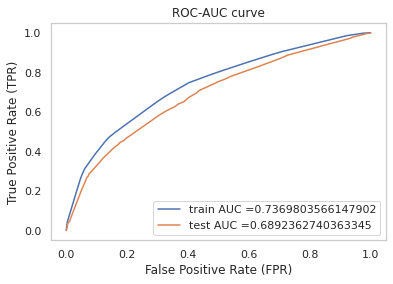

In [ ]:
# Plotting ROC curve on both test and train data - Tf-Idf
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_prob_score)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_prob_score) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("False Positive Rate (FPR)") 
plt.ylabel("True Positive Rate (TPR)") 
plt.title("ROC-AUC curve")
plt.grid()
plt.show()

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

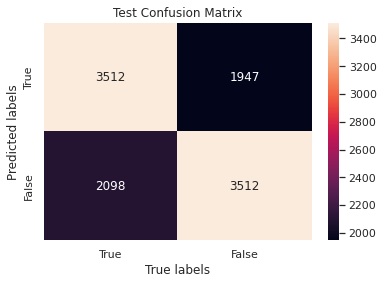

In [ ]:
# Confusion matrix on the predictions on test data
y_pred = best_clf.predict(X_te_set1)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True', 'False'])

### Analyzing false positive data points - set 1

In [ ]:
# Getting all false positive indices - datapoints
fp_indices = []
y_true = y_test.values
from tqdm import tqdm
for i in tqdm(range(len(y_pred))):
  if(y_true[i] == 0 and y_pred[i] == 1):
    fp_indices.append(i)

len(fp_indices)

100%|██████████| 11069/11069 [00:00<00:00, 553496.72it/s]


1947

In [ ]:
fp_df = X_test.iloc[fp_indices]
fp_df.shape

(1947, 13)

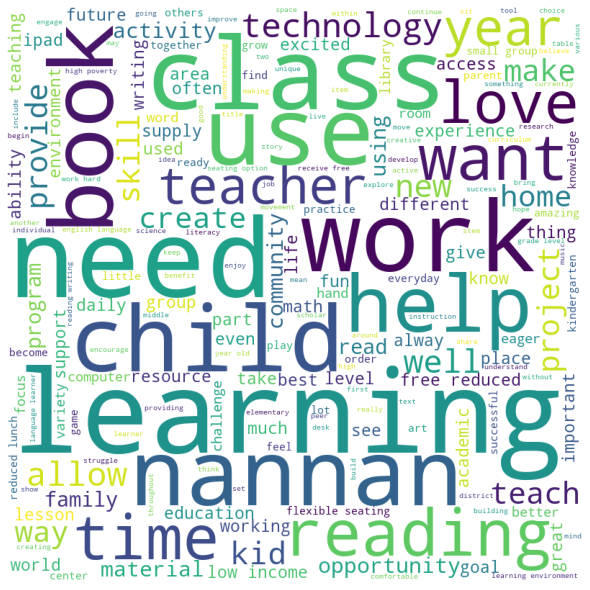

In [ ]:
# Word Cloud for false positive essays.
comment_words = ''
stopwords = set(STOPWORDS)

for essay in fp_df['essay'].values:
     
    # typecaste each val to string
    essay = str(essay)
 
    # split the value
    tokens = essay.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

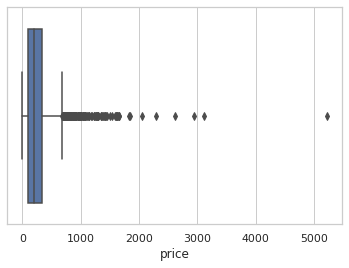

In [ ]:
# box plot for price of false positive p0ints
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=fp_df["price"])

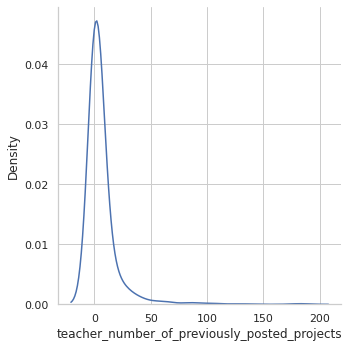

In [ ]:
# probability density function for teacher_number_of_previously_posted_projects
sns.displot(fp_df, x="teacher_number_of_previously_posted_projects", kind="kde", bw_adjust=2)

# **For set 2 - Using Word2Vec TfIdf vectorizer**

---





In [ ]:
def create_w2v(data):  
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(data['essay'].values)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data['essay'].values): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [ ]:
X_train_w2v =create_w2v(X_train)
X_test_w2v =create_w2v(X_test)
print(len(X_train_w2v))
print(len(X_train_w2v[0]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

100%|██████████| 22473/22473 [00:33<00:00, 671.68it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

100%|██████████| 11069/11069 [00:16<00:00, 671.23it/s]

22473
300


In [ ]:
X_tr_w2v_set2 = hstack((X_train_w2v, school_state_train, teacher_prefix_train, project_grade_cat_train, price_train, submissions_train, pos_train, neg_train, neu_train, com_train)).tocsr()
X_te_w2v_set2 = hstack((X_test_w2v, school_state_test, teacher_prefix_test, project_grade_cat_test, price_test, submissions_test, pos_test, neg_test, neu_test, com_test)).tocsr()
print("Final Data matrix")
print(X_tr_w2v_set2.shape, y_train.shape) 
print(X_te_w2v_set2.shape, y_test.shape) 
print("="*100)

Final Data matrix
(22473, 366) (22473,)
(11069, 366) (11069,)


### Hyper parameter tuning - set 2

In [ ]:
depth = [1, 3, 10, 30]
min_samples_split = [5, 10, 100, 500]
params = {"max_depth" : depth, "min_samples_split": min_samples_split }
decision_treee = DecisionTreeClassifier()
clf = GridSearchCV(decision_treee, params, cv = 3, scoring='roc_auc', return_train_score = True)
clf.fit(X_tr_w2v_set2, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
results_set2 = pd.DataFrame.from_dict(clf.cv_results_)
results_set2.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.802997,0.005558,0.018820,0.001305,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.547091,0.551784,0.555417,0.55143,0.003408,13,0.552617,0.552592,0.554281,0.553163,0.00079
1,0.799986,0.002754,0.017024,0.000245,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.547091,0.551784,0.555417,0.55143,0.003408,13,0.552617,0.552592,0.554281,0.553163,0.00079


In [ ]:
cv_auc = results_set2['mean_test_score'].values
train_auc = results_set2['mean_train_score'].values
y_axis = results_set2['param_max_depth']
x_axis = results_set2['param_min_samples_split']

x = sorted(zip(cv_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
cv_auc = np.array(x[:, 0])
cv_x = np.array(x[:, 1])
cv_y = np.array(x[:, 2])

x = sorted(zip(train_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
train_auc = np.array(x[:, 0])
train_x = np.array(x[:, 1])
train_y = np.array(x[:, 2])

In [ ]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=train_x, y=train_y, z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=cv_x ,y=cv_y , z=cv_auc, name = 'Cross validation')
data_3d_plot = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data_3d_plot, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### ROC and confusion matrix - set 2

In [ ]:
best_params = clf.best_params_
best_clf_set2 = DecisionTreeClassifier()
best_clf_set2.set_params(**best_params)
best_clf_set2.fit(X_tr_w2v_set2, y_train)
print(best_params)

{'max_depth': 10, 'min_samples_split': 500}


In [ ]:
train_prob_score = batch_predict(best_clf_set2, X_tr_w2v_set2)
test_prob_score = batch_predict(best_clf_set2, X_te_w2v_set2)

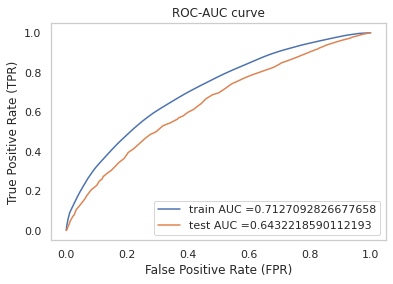

In [ ]:
# Plotting ROC curve on both test and train data - Tf-Idf w2v
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_prob_score)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_prob_score) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("False Positive Rate (FPR)") 
plt.ylabel("True Positive Rate (TPR)") 
plt.title("ROC-AUC curve")
plt.grid()
plt.show()

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

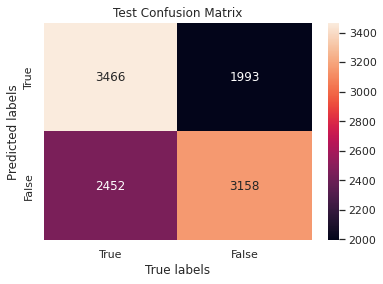

In [ ]:
# Confusion matrix on the predictions on test data
y_pred = best_clf_set2.predict(X_te_w2v_set2)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels');
ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True', 'False'])

### False positive analysis - set 2 

In [ ]:
# Getting all false positive indices - datapoints
fp_indices = []
y_true = y_test.values
from tqdm import tqdm
for i in tqdm(range(len(y_pred))):
  if(y_true[i] == 0 and y_pred[i] == 1):
    fp_indices.append(i)

len(fp_indices)

100%|██████████| 11069/11069 [00:00<00:00, 771952.23it/s]


1993

In [ ]:
fp_df = X_test.iloc[fp_indices]
fp_df.shape

(1993, 13)

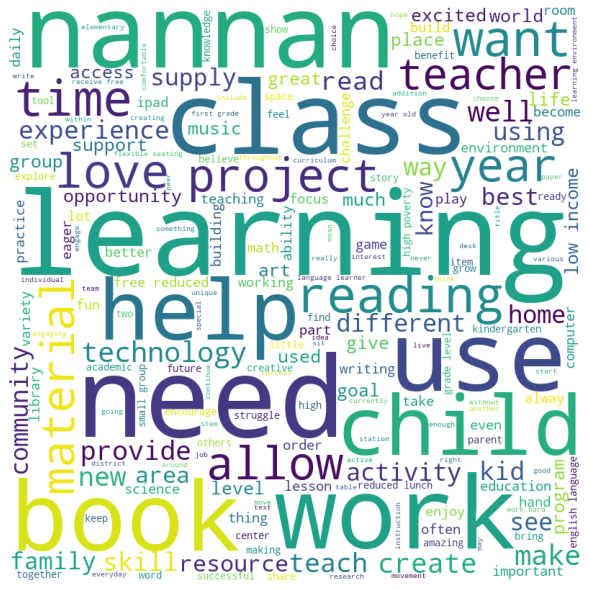

In [ ]:
# Word Cloud for false positive essays.
comment_words = ''
stopwords = set(STOPWORDS)

for essay in fp_df['essay'].values:
     
    # typecaste each val to string
    essay = str(essay)
 
    # split the value
    tokens = essay.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

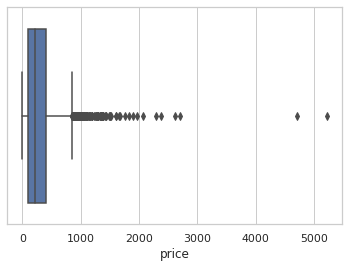

In [ ]:
# box plot for price of false positive p0ints
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=fp_df["price"])

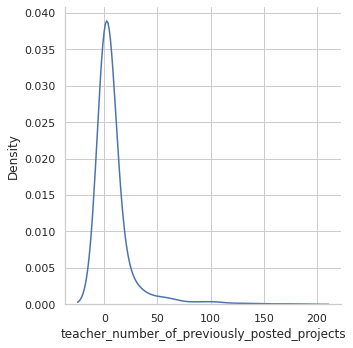

In [ ]:
# probability density function for teacher_number_of_previously_posted_projects
sns.displot(fp_df, x="teacher_number_of_previously_posted_projects", kind="kde", bw_adjust=2)

# Part 2 - Selecting important features

---


In [ ]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


### Getting Feature importances

In [ ]:
ds_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
ds_clf.fit(X_tr_set1, y_train)
feature_importances = ds_clf.feature_importances_

In [ ]:
# Selecting indexes of non zero important features
imp_features_idx = []
for i in range(len(feature_importances)):
  if(feature_importances[i] > 0):
    imp_features_idx.append(i)

imp_features_idx = np.array(imp_features_idx)

In [ ]:
X_train_imp = X_tr_set1[:, imp_features_idx]
print(X_train_imp.shape)

X_test_imp = X_te_set1[:, imp_features_idx]
print(X_test_imp.shape)

(22473, 1322)
(11069, 1322)


### Hyper parameter tuning - important features
Classifier used : Decision Tree

In [ ]:
depth = [1, 3, 10, 30]
min_samples_split = [5, 10, 100, 500]
params = {"max_depth" : depth, "min_samples_split": min_samples_split }
decision_treee = DecisionTreeClassifier()
clf = GridSearchCV(decision_treee, params, cv = 3, scoring='roc_auc', return_train_score = True)
clf.fit(X_train_imp, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
results_imp_features = pd.DataFrame.from_dict(clf.cv_results_)
results_imp_features.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.168621,0.003841,0.007587,0.000304,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
1,0.163831,0.001743,0.007243,0.000191,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
2,0.166300,0.002882,0.007391,0.000526,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
3,0.169357,0.004265,0.007269,0.000183,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.577149,0.577530,0.582318,0.578999,0.002352,12,0.579861,0.579865,0.577471,0.579066,0.001128
4,0.445544,0.001237,0.007674,0.000141,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.653764,0.657291,0.662191,0.657749,0.003456,8,0.662088,0.661369,0.660163,0.661207,0.000794


In [ ]:
cv_auc = results_imp_features['mean_test_score'].values
train_auc = results_imp_features['mean_train_score'].values
y_axis = results_imp_features['param_max_depth']
x_axis = results_imp_features['param_min_samples_split']

x = sorted(zip(cv_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
cv_auc = np.array(x[:, 0])
cv_x = np.array(x[:, 1])
cv_y = np.array(x[:, 2])

x = sorted(zip(train_auc, x_axis, y_axis))
for i in range(len(x)):
  x[i] = list(x[i])

x = np.array(x)
train_auc = np.array(x[:, 0])
train_x = np.array(x[:, 1])
train_y = np.array(x[:, 2])

In [ ]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=train_x, y=train_y, z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=cv_x ,y=cv_y , z=cv_auc, name = 'Cross validation')
data_3d_plot = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data_3d_plot, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### Training the model with best hyper parameters - ROC and confusion matrix

In [ ]:
best_params = clf.best_params_
best_clf_set3 = DecisionTreeClassifier()
best_clf_set3.set_params(**best_params)
best_clf_set3.fit(X_train_imp, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [ ]:
train_prob_score = batch_predict(best_clf_set3, X_train_imp)
test_prob_score = batch_predict(best_clf_set3, X_test_imp)

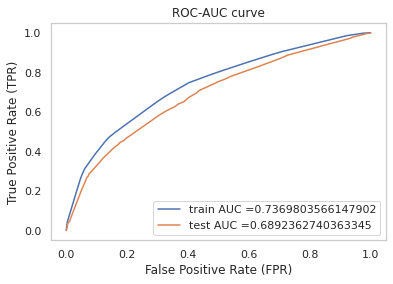

In [ ]:
# Plotting ROC curve on both test and train data - important features only
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_prob_score)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_prob_score) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("False Positive Rate (FPR)") 
plt.ylabel("True Positive Rate (TPR)") 
plt.title("ROC-AUC curve")
plt.grid()
plt.show()

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

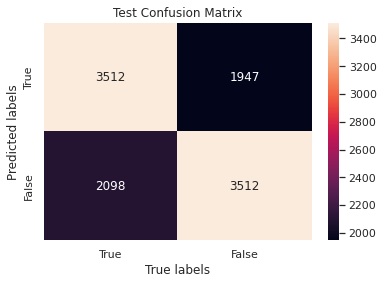

In [ ]:
# Confusion matrix on the predictions on test data
y_pred = best_clf_set3.predict(X_test_imp)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True', 'False'])

### Analyzing false positive points - set 3

In [ ]:
# Getting all false positive indices - datapoints
fp_indices = []
y_true = y_test.values
from tqdm import tqdm
for i in tqdm(range(len(y_pred))):
  if(y_true[i] == 0 and y_pred[i] == 1):
    fp_indices.append(i)

len(fp_indices)

100%|██████████| 11069/11069 [00:00<00:00, 724636.74it/s]


1947

In [ ]:
fp_df = X_test.iloc[fp_indices]
fp_df.shape

(1947, 13)

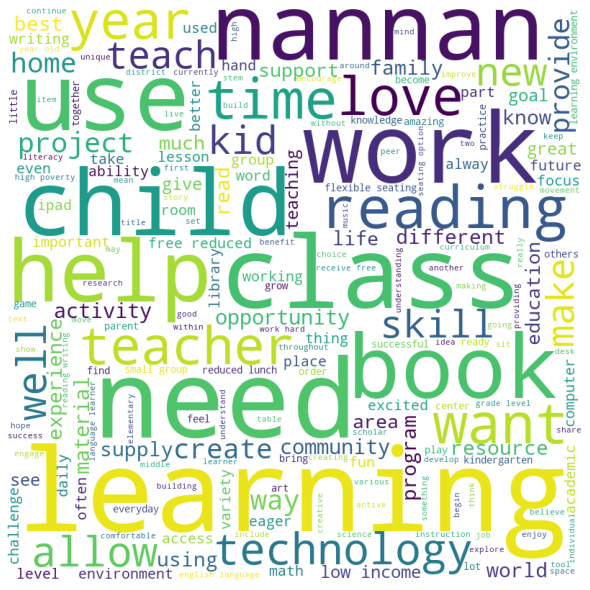

In [ ]:
# Word Cloud for false positive essays.
comment_words = ''
stopwords = set(STOPWORDS)

for essay in fp_df['essay'].values:
     
    # typecaste each val to string
    essay = str(essay)
 
    # split the value
    tokens = essay.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

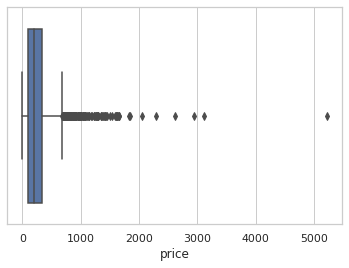

In [ ]:
# box plot for price of false positive p0ints
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=fp_df["price"])

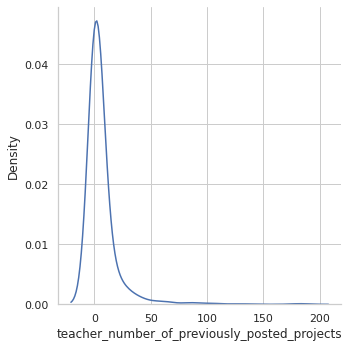

In [ ]:
# probability density function for teacher_number_of_previously_posted_projects
sns.displot(fp_df, x="teacher_number_of_previously_posted_projects", kind="kde", bw_adjust=2)

# Results

---




In [ ]:
 # model hyperparameter auc
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "max_depth", "min sample split", "AUC"] 
x.add_row(["TF-IDF", 'Decision Tree', 10, 500,  0.698]) 
x.add_row(["W2V Tf Idf", 'Decision Tree', 30, 500, 0.646])
x.add_row(["Selected imp features", 'Decision Tree', 10, 500, 0.678])
x

Vectorizer,Model,max_depth,min sample split,AUC
TF-IDF,Decision Tree,10,500,0.698
W2V Tf Idf,Decision Tree,30,500,0.646
Selected imp features,Decision Tree,10,500,0.678
